### <b> Lane-Emden (numerical) solutions for a given n </b>

#### <b> 1. Lane-Emden equation: (ξ = xi, θ = theta) </b>

* $ 1/ξ^2 * d/dξ(ξ^2 * dθ/dξ) + θ^n $ <b> (eq. 1) </b> 

By expanding the derivative term $ 1/ξ^2 * d/dξ(ξ^2 * dθ/dξ) $:

*  $ 1/ξ^2(2ξ * dθ/dξ + ξ^2 * d^2θ/dξ^2) =$ 
    * $ = 2/ξ * dθ/dξ + d^2θ/dξ^2 $ <b> (eq. 2) </b>

#### <b> 2. Inserting the expanded derivative into the first equation </b>
Inserting the expanded derivative <b> (eq.2) </b> back into the first equation <b>(eq.1)</b>, we get a second order differential equation $ θ(ξ)$:

* <b> $ d^2θ/dξ^2 + 2/ξ* dθ/dξ + θ^n = 0$ </b>

#### <b> 3. Turning the Second ODE into a First ODE </b>

We can define a new variable for the first derivative of theta $(dθ/dξ)$ as follows:

* $y1(ξ) = θ $
* $ y2(ξ) = dθ/dξ = dy1/dξ $

And as such, the second derivative of theta can be expressed as a first order derivative:
* $dy2/dξ = d^2θ/dξ^2 $



#### <b> 4. Rewriting he Lane-Emden equation </b>

Substituting $y1$ and $y2$ into the Lane-Emden equation, we get:

* $dy2/ξ+ 2/ξ*y2 + y1^n = 0$

#### <b> 5. First Order System and Initial Conditions </b>

After substituting $y1$ and $y2$ into the original Lane-Emden equations, we can now formulate a Fist Order Differential Equations System (instead of a Second Order one), and solve it numerically using the initial conditions as expressed below:

* System:
    * $ dy1/dξ = y2 $
    * $ dy2/dξ = -2/ξ * y2 - y1^n $

* Initial Conditions:
    * $ θ(ξ = 0) = y1(0) = 1 $
    * $ dθ(ξ = 0)/dξ = y2(0) = 0 $

In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [2]:
# First ODE system
def lane_emden_sys(xi, S, n):
    y1, y2 = S
    dy1_dxi = y2
    dy2_dxi = -2*y2/xi - np.abs(y1)**n

    return [dy1_dxi, dy2_dxi]

def lane_emden_solver(n):


    # xi Range
    xi_0 = 1e-7 # prevent numerical singularity
    xi_range = np.linspace(xi_0, 40, 100000)

    # Initial Conditions
    y1_0 = 1 - xi_0**2 / 2           # θ(ξ₀) ≈ 1 - ξ₀²/2
    y2_0 = -xi_0                        # dθ/dξ(ξ₀) ≈ -ξ₀
    lane_em_0 = [y1_0, y2_0]

    # Solve
    sol = odeint(lane_emden_sys, lane_em_0, xi_range,tfirst=True, args=(n,))

    return sol, xi_range # solution arrays for y1 = theta and y2 dtheta/dxi



In [3]:
def lane_emden_plots(sol, xi_range):

    y1_sol = sol.T[0]
    
    plt.plot(xi_range, y1_sol, label=r'$\theta(\xi)$')
    # plt.plot(xi_range, y2_sol, label=r"$\frac{d\theta}{d\xi}$")

    plt.ylim(0,1)
    plt.xlim(0,15)
    plt.xlabel(r'$\xi$')
    plt.ylabel('Values')
    plt.title('Lane-Emden Solution')

    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
def lane_emden_plots_v2(solutions, xi_range, ns):
    plt.figure(figsize=(10, 6))  # Create a single figure for all plots

    for i, sol in enumerate(solutions):
        y1_sol = sol.T[0]
        plt.plot(xi_range, y1_sol, label=f'n = {ns[i]}')  # Plot each solution with label

    plt.xlabel(r'$\xi$')
    plt.ylabel(r'$\theta(\xi)$')
    plt.ylim(0,1)
    plt.xlim(0,15)
    plt.title('Lane-Emden Solutions for Different values of n')
    plt.legend()
    plt.grid(True)
    plt.show()

/var/folders/vw/fb5g0yw578jfpvmgdl2bgkr80000gn/T/ipykernel_4671/2598433903.py:22: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(lane_emden_sys, lane_em_0, xi_range,tfirst=True, args=(n,))


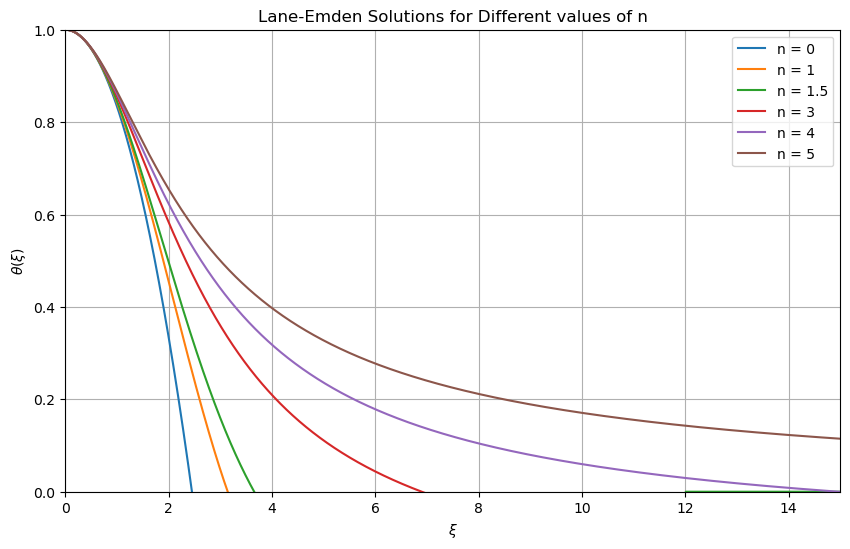

In [5]:
# List of n values
ns = [0,1, 1.5, 3, 4, 5]
solutions = []

# Solve for each n and collect solutions
for i in ns:
    sol, xi_range = lane_emden_solver(i)
    solutions.append(sol)

# Plot all solutions in one graph
lane_emden_plots_v2(solutions, xi_range, ns)